# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

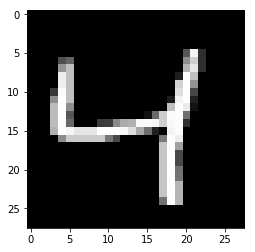

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [15]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(dtype = tf.float32, shape = (None, 784))
targets_ = tf.placeholder(dtype = tf.float32, shape = (None, 784))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs=inputs_, units=encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs=encoded, units=784, activation=None)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.01).minimize(cost)

## Training

In [16]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [17]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6374
Epoch: 1/20... Training loss: 0.5449
Epoch: 1/20... Training loss: 0.4390
Epoch: 1/20... Training loss: 0.3556
Epoch: 1/20... Training loss: 0.3213
Epoch: 1/20... Training loss: 0.3225
Epoch: 1/20... Training loss: 0.3232
Epoch: 1/20... Training loss: 0.3014
Epoch: 1/20... Training loss: 0.3115
Epoch: 1/20... Training loss: 0.3010
Epoch: 1/20... Training loss: 0.3033
Epoch: 1/20... Training loss: 0.2868
Epoch: 1/20... Training loss: 0.2783
Epoch: 1/20... Training loss: 0.2735
Epoch: 1/20... Training loss: 0.2750
Epoch: 1/20... Training loss: 0.2662
Epoch: 1/20... Training loss: 0.2582
Epoch: 1/20... Training loss: 0.2594
Epoch: 1/20... Training loss: 0.2595
Epoch: 1/20... Training loss: 0.2474
Epoch: 1/20... Training loss: 0.2553
Epoch: 1/20... Training loss: 0.2478
Epoch: 1/20... Training loss: 0.2451
Epoch: 1/20... Training loss: 0.2373
Epoch: 1/20... Training loss: 0.2443
Epoch: 1/20... Training loss: 0.2355
E

Epoch: 1/20... Training loss: 0.1254
Epoch: 1/20... Training loss: 0.1234
Epoch: 1/20... Training loss: 0.1253
Epoch: 1/20... Training loss: 0.1221
Epoch: 1/20... Training loss: 0.1248
Epoch: 1/20... Training loss: 0.1259
Epoch: 1/20... Training loss: 0.1256
Epoch: 1/20... Training loss: 0.1251
Epoch: 1/20... Training loss: 0.1209
Epoch: 1/20... Training loss: 0.1238
Epoch: 1/20... Training loss: 0.1277
Epoch: 1/20... Training loss: 0.1252
Epoch: 1/20... Training loss: 0.1234
Epoch: 1/20... Training loss: 0.1233
Epoch: 1/20... Training loss: 0.1237
Epoch: 1/20... Training loss: 0.1234
Epoch: 1/20... Training loss: 0.1302
Epoch: 1/20... Training loss: 0.1226
Epoch: 1/20... Training loss: 0.1227
Epoch: 1/20... Training loss: 0.1216
Epoch: 1/20... Training loss: 0.1305
Epoch: 1/20... Training loss: 0.1260
Epoch: 1/20... Training loss: 0.1188
Epoch: 1/20... Training loss: 0.1257
Epoch: 1/20... Training loss: 0.1226
Epoch: 1/20... Training loss: 0.1233
Epoch: 1/20... Training loss: 0.1210
E

Epoch: 2/20... Training loss: 0.1192
Epoch: 2/20... Training loss: 0.1161
Epoch: 2/20... Training loss: 0.1112
Epoch: 2/20... Training loss: 0.1236
Epoch: 2/20... Training loss: 0.1199
Epoch: 2/20... Training loss: 0.1218
Epoch: 2/20... Training loss: 0.1150
Epoch: 2/20... Training loss: 0.1215
Epoch: 2/20... Training loss: 0.1187
Epoch: 2/20... Training loss: 0.1182
Epoch: 2/20... Training loss: 0.1184
Epoch: 2/20... Training loss: 0.1225
Epoch: 2/20... Training loss: 0.1131
Epoch: 2/20... Training loss: 0.1146
Epoch: 2/20... Training loss: 0.1211
Epoch: 2/20... Training loss: 0.1152
Epoch: 2/20... Training loss: 0.1211
Epoch: 2/20... Training loss: 0.1163
Epoch: 2/20... Training loss: 0.1213
Epoch: 2/20... Training loss: 0.1196
Epoch: 2/20... Training loss: 0.1134
Epoch: 2/20... Training loss: 0.1161
Epoch: 2/20... Training loss: 0.1198
Epoch: 2/20... Training loss: 0.1185
Epoch: 2/20... Training loss: 0.1192
Epoch: 2/20... Training loss: 0.1160
Epoch: 2/20... Training loss: 0.1108
E

Epoch: 3/20... Training loss: 0.1145
Epoch: 3/20... Training loss: 0.1197
Epoch: 3/20... Training loss: 0.1167
Epoch: 3/20... Training loss: 0.1141
Epoch: 3/20... Training loss: 0.1130
Epoch: 3/20... Training loss: 0.1129
Epoch: 3/20... Training loss: 0.1149
Epoch: 3/20... Training loss: 0.1144
Epoch: 3/20... Training loss: 0.1122
Epoch: 3/20... Training loss: 0.1201
Epoch: 3/20... Training loss: 0.1206
Epoch: 3/20... Training loss: 0.1143
Epoch: 3/20... Training loss: 0.1176
Epoch: 3/20... Training loss: 0.1102
Epoch: 3/20... Training loss: 0.1153
Epoch: 3/20... Training loss: 0.1164
Epoch: 3/20... Training loss: 0.1192
Epoch: 3/20... Training loss: 0.1131
Epoch: 3/20... Training loss: 0.1173
Epoch: 3/20... Training loss: 0.1181
Epoch: 3/20... Training loss: 0.1147
Epoch: 3/20... Training loss: 0.1145
Epoch: 3/20... Training loss: 0.1157
Epoch: 3/20... Training loss: 0.1153
Epoch: 3/20... Training loss: 0.1129
Epoch: 3/20... Training loss: 0.1209
Epoch: 3/20... Training loss: 0.1169
E

Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1091
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1104
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1162
E

Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1117
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1113
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1132
E

Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1191
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1203
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1170
E

Epoch: 6/20... Training loss: 0.1153
Epoch: 6/20... Training loss: 0.1147
Epoch: 6/20... Training loss: 0.1196
Epoch: 6/20... Training loss: 0.1157
Epoch: 6/20... Training loss: 0.1207
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1162
Epoch: 6/20... Training loss: 0.1152
Epoch: 6/20... Training loss: 0.1174
Epoch: 6/20... Training loss: 0.1144
Epoch: 6/20... Training loss: 0.1157
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1185
Epoch: 6/20... Training loss: 0.1125
Epoch: 6/20... Training loss: 0.1169
Epoch: 6/20... Training loss: 0.1131
Epoch: 6/20... Training loss: 0.1126
Epoch: 6/20... Training loss: 0.1147
Epoch: 6/20... Training loss: 0.1132
Epoch: 6/20... Training loss: 0.1163
Epoch: 6/20... Training loss: 0.1158
Epoch: 6/20... Training loss: 0.1131
Epoch: 6/20... Training loss: 0.1135
Epoch: 6/20... Training loss: 0.1140
Epoch: 6/20... Training loss: 0.1149
Epoch: 6/20... Training loss: 0.1113
Epoch: 6/20... Training loss: 0.1187
E

Epoch: 7/20... Training loss: 0.1131
Epoch: 7/20... Training loss: 0.1196
Epoch: 7/20... Training loss: 0.1141
Epoch: 7/20... Training loss: 0.1140
Epoch: 7/20... Training loss: 0.1161
Epoch: 7/20... Training loss: 0.1127
Epoch: 7/20... Training loss: 0.1177
Epoch: 7/20... Training loss: 0.1176
Epoch: 7/20... Training loss: 0.1141
Epoch: 7/20... Training loss: 0.1122
Epoch: 7/20... Training loss: 0.1114
Epoch: 7/20... Training loss: 0.1169
Epoch: 7/20... Training loss: 0.1162
Epoch: 7/20... Training loss: 0.1161
Epoch: 7/20... Training loss: 0.1129
Epoch: 7/20... Training loss: 0.1120
Epoch: 7/20... Training loss: 0.1173
Epoch: 7/20... Training loss: 0.1115
Epoch: 7/20... Training loss: 0.1123
Epoch: 7/20... Training loss: 0.1093
Epoch: 7/20... Training loss: 0.1157
Epoch: 7/20... Training loss: 0.1151
Epoch: 7/20... Training loss: 0.1123
Epoch: 7/20... Training loss: 0.1158
Epoch: 7/20... Training loss: 0.1144
Epoch: 7/20... Training loss: 0.1157
Epoch: 7/20... Training loss: 0.1124
E

Epoch: 8/20... Training loss: 0.1149
Epoch: 8/20... Training loss: 0.1124
Epoch: 8/20... Training loss: 0.1154
Epoch: 8/20... Training loss: 0.1127
Epoch: 8/20... Training loss: 0.1134
Epoch: 8/20... Training loss: 0.1110
Epoch: 8/20... Training loss: 0.1161
Epoch: 8/20... Training loss: 0.1105
Epoch: 8/20... Training loss: 0.1089
Epoch: 8/20... Training loss: 0.1152
Epoch: 8/20... Training loss: 0.1126
Epoch: 8/20... Training loss: 0.1129
Epoch: 8/20... Training loss: 0.1158
Epoch: 8/20... Training loss: 0.1177
Epoch: 8/20... Training loss: 0.1154
Epoch: 8/20... Training loss: 0.1140
Epoch: 8/20... Training loss: 0.1114
Epoch: 8/20... Training loss: 0.1174
Epoch: 8/20... Training loss: 0.1132
Epoch: 8/20... Training loss: 0.1129
Epoch: 8/20... Training loss: 0.1106
Epoch: 8/20... Training loss: 0.1123
Epoch: 8/20... Training loss: 0.1133
Epoch: 8/20... Training loss: 0.1129
Epoch: 8/20... Training loss: 0.1146
Epoch: 8/20... Training loss: 0.1185
Epoch: 8/20... Training loss: 0.1201
E

Epoch: 8/20... Training loss: 0.1125
Epoch: 8/20... Training loss: 0.1185
Epoch: 8/20... Training loss: 0.1157
Epoch: 8/20... Training loss: 0.1094
Epoch: 8/20... Training loss: 0.1133
Epoch: 8/20... Training loss: 0.1200
Epoch: 8/20... Training loss: 0.1142
Epoch: 8/20... Training loss: 0.1165
Epoch: 8/20... Training loss: 0.1161
Epoch: 8/20... Training loss: 0.1149
Epoch: 8/20... Training loss: 0.1141
Epoch: 8/20... Training loss: 0.1120
Epoch: 8/20... Training loss: 0.1123
Epoch: 8/20... Training loss: 0.1144
Epoch: 8/20... Training loss: 0.1166
Epoch: 8/20... Training loss: 0.1136
Epoch: 9/20... Training loss: 0.1133
Epoch: 9/20... Training loss: 0.1082
Epoch: 9/20... Training loss: 0.1147
Epoch: 9/20... Training loss: 0.1182
Epoch: 9/20... Training loss: 0.1152
Epoch: 9/20... Training loss: 0.1115
Epoch: 9/20... Training loss: 0.1142
Epoch: 9/20... Training loss: 0.1153
Epoch: 9/20... Training loss: 0.1153
Epoch: 9/20... Training loss: 0.1166
Epoch: 9/20... Training loss: 0.1109
E

Epoch: 9/20... Training loss: 0.1177
Epoch: 9/20... Training loss: 0.1148
Epoch: 9/20... Training loss: 0.1139
Epoch: 9/20... Training loss: 0.1120
Epoch: 9/20... Training loss: 0.1169
Epoch: 9/20... Training loss: 0.1118
Epoch: 9/20... Training loss: 0.1170
Epoch: 9/20... Training loss: 0.1124
Epoch: 9/20... Training loss: 0.1123
Epoch: 9/20... Training loss: 0.1157
Epoch: 9/20... Training loss: 0.1107
Epoch: 9/20... Training loss: 0.1125
Epoch: 9/20... Training loss: 0.1160
Epoch: 9/20... Training loss: 0.1134
Epoch: 9/20... Training loss: 0.1112
Epoch: 9/20... Training loss: 0.1156
Epoch: 9/20... Training loss: 0.1112
Epoch: 9/20... Training loss: 0.1173
Epoch: 9/20... Training loss: 0.1153
Epoch: 9/20... Training loss: 0.1143
Epoch: 9/20... Training loss: 0.1129
Epoch: 9/20... Training loss: 0.1147
Epoch: 9/20... Training loss: 0.1136
Epoch: 9/20... Training loss: 0.1167
Epoch: 9/20... Training loss: 0.1112
Epoch: 9/20... Training loss: 0.1156
Epoch: 9/20... Training loss: 0.1187
E

Epoch: 10/20... Training loss: 0.1158
Epoch: 10/20... Training loss: 0.1178
Epoch: 10/20... Training loss: 0.1158
Epoch: 10/20... Training loss: 0.1199
Epoch: 10/20... Training loss: 0.1111
Epoch: 10/20... Training loss: 0.1139
Epoch: 10/20... Training loss: 0.1128
Epoch: 10/20... Training loss: 0.1135
Epoch: 10/20... Training loss: 0.1103
Epoch: 10/20... Training loss: 0.1148
Epoch: 10/20... Training loss: 0.1137
Epoch: 10/20... Training loss: 0.1142
Epoch: 10/20... Training loss: 0.1105
Epoch: 10/20... Training loss: 0.1215
Epoch: 10/20... Training loss: 0.1134
Epoch: 10/20... Training loss: 0.1181
Epoch: 10/20... Training loss: 0.1113
Epoch: 10/20... Training loss: 0.1119
Epoch: 10/20... Training loss: 0.1067
Epoch: 10/20... Training loss: 0.1119
Epoch: 10/20... Training loss: 0.1209
Epoch: 10/20... Training loss: 0.1172
Epoch: 10/20... Training loss: 0.1166
Epoch: 10/20... Training loss: 0.1094
Epoch: 10/20... Training loss: 0.1154
Epoch: 10/20... Training loss: 0.1170
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1148
Epoch: 11/20... Training loss: 0.1146
Epoch: 11/20... Training loss: 0.1118
Epoch: 11/20... Training loss: 0.1109
Epoch: 11/20... Training loss: 0.1113
Epoch: 11/20... Training loss: 0.1107
Epoch: 11/20... Training loss: 0.1138
Epoch: 11/20... Training loss: 0.1144
Epoch: 11/20... Training loss: 0.1173
Epoch: 11/20... Training loss: 0.1127
Epoch: 11/20... Training loss: 0.1121
Epoch: 11/20... Training loss: 0.1132
Epoch: 11/20... Training loss: 0.1146
Epoch: 11/20... Training loss: 0.1161
Epoch: 11/20... Training loss: 0.1164
Epoch: 11/20... Training loss: 0.1155
Epoch: 11/20... Training loss: 0.1127
Epoch: 11/20... Training loss: 0.1133
Epoch: 11/20... Training loss: 0.1113
Epoch: 11/20... Training loss: 0.1119
Epoch: 11/20... Training loss: 0.1102
Epoch: 11/20... Training loss: 0.1124
Epoch: 11/20... Training loss: 0.1104
Epoch: 11/20... Training loss: 0.1131
Epoch: 11/20... Training loss: 0.1140
Epoch: 11/20... Training loss: 0.1123
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1139
Epoch: 12/20... Training loss: 0.1143
Epoch: 12/20... Training loss: 0.1137
Epoch: 12/20... Training loss: 0.1154
Epoch: 12/20... Training loss: 0.1104
Epoch: 12/20... Training loss: 0.1149
Epoch: 12/20... Training loss: 0.1154
Epoch: 12/20... Training loss: 0.1096
Epoch: 12/20... Training loss: 0.1147
Epoch: 12/20... Training loss: 0.1124
Epoch: 12/20... Training loss: 0.1159
Epoch: 12/20... Training loss: 0.1112
Epoch: 12/20... Training loss: 0.1165
Epoch: 12/20... Training loss: 0.1151
Epoch: 12/20... Training loss: 0.1085
Epoch: 12/20... Training loss: 0.1134
Epoch: 12/20... Training loss: 0.1145
Epoch: 12/20... Training loss: 0.1145
Epoch: 12/20... Training loss: 0.1155
Epoch: 12/20... Training loss: 0.1129
Epoch: 12/20... Training loss: 0.1173
Epoch: 12/20... Training loss: 0.1127
Epoch: 12/20... Training loss: 0.1127
Epoch: 12/20... Training loss: 0.1183
Epoch: 12/20... Training loss: 0.1130
Epoch: 12/20... Training loss: 0.1157
Epoch: 12/20

Epoch: 12/20... Training loss: 0.1111
Epoch: 12/20... Training loss: 0.1167
Epoch: 12/20... Training loss: 0.1119
Epoch: 12/20... Training loss: 0.1145
Epoch: 12/20... Training loss: 0.1167
Epoch: 12/20... Training loss: 0.1129
Epoch: 12/20... Training loss: 0.1158
Epoch: 12/20... Training loss: 0.1116
Epoch: 12/20... Training loss: 0.1164
Epoch: 12/20... Training loss: 0.1152
Epoch: 12/20... Training loss: 0.1106
Epoch: 12/20... Training loss: 0.1224
Epoch: 12/20... Training loss: 0.1140
Epoch: 13/20... Training loss: 0.1095
Epoch: 13/20... Training loss: 0.1179
Epoch: 13/20... Training loss: 0.1116
Epoch: 13/20... Training loss: 0.1102
Epoch: 13/20... Training loss: 0.1147
Epoch: 13/20... Training loss: 0.1145
Epoch: 13/20... Training loss: 0.1157
Epoch: 13/20... Training loss: 0.1108
Epoch: 13/20... Training loss: 0.1137
Epoch: 13/20... Training loss: 0.1128
Epoch: 13/20... Training loss: 0.1153
Epoch: 13/20... Training loss: 0.1173
Epoch: 13/20... Training loss: 0.1112
Epoch: 13/20

Epoch: 13/20... Training loss: 0.1122
Epoch: 13/20... Training loss: 0.1121
Epoch: 13/20... Training loss: 0.1129
Epoch: 13/20... Training loss: 0.1100
Epoch: 13/20... Training loss: 0.1105
Epoch: 13/20... Training loss: 0.1141
Epoch: 13/20... Training loss: 0.1185
Epoch: 13/20... Training loss: 0.1167
Epoch: 13/20... Training loss: 0.1095
Epoch: 13/20... Training loss: 0.1099
Epoch: 13/20... Training loss: 0.1138
Epoch: 13/20... Training loss: 0.1141
Epoch: 13/20... Training loss: 0.1151
Epoch: 13/20... Training loss: 0.1140
Epoch: 13/20... Training loss: 0.1156
Epoch: 13/20... Training loss: 0.1097
Epoch: 13/20... Training loss: 0.1127
Epoch: 13/20... Training loss: 0.1124
Epoch: 13/20... Training loss: 0.1165
Epoch: 13/20... Training loss: 0.1146
Epoch: 13/20... Training loss: 0.1132
Epoch: 13/20... Training loss: 0.1132
Epoch: 13/20... Training loss: 0.1094
Epoch: 13/20... Training loss: 0.1127
Epoch: 13/20... Training loss: 0.1175
Epoch: 13/20... Training loss: 0.1153
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1153
Epoch: 14/20... Training loss: 0.1167
Epoch: 14/20... Training loss: 0.1149
Epoch: 14/20... Training loss: 0.1144
Epoch: 14/20... Training loss: 0.1158
Epoch: 14/20... Training loss: 0.1135
Epoch: 14/20... Training loss: 0.1123
Epoch: 14/20... Training loss: 0.1157
Epoch: 14/20... Training loss: 0.1126
Epoch: 14/20... Training loss: 0.1134
Epoch: 14/20... Training loss: 0.1131
Epoch: 14/20... Training loss: 0.1119
Epoch: 14/20... Training loss: 0.1169
Epoch: 14/20... Training loss: 0.1122
Epoch: 14/20... Training loss: 0.1141
Epoch: 14/20... Training loss: 0.1109
Epoch: 14/20... Training loss: 0.1190
Epoch: 14/20... Training loss: 0.1087
Epoch: 14/20... Training loss: 0.1107
Epoch: 14/20... Training loss: 0.1166
Epoch: 14/20... Training loss: 0.1124
Epoch: 14/20... Training loss: 0.1152
Epoch: 14/20... Training loss: 0.1223
Epoch: 14/20... Training loss: 0.1178
Epoch: 14/20... Training loss: 0.1145
Epoch: 14/20... Training loss: 0.1147
Epoch: 14/20

Epoch: 15/20... Training loss: 0.1156
Epoch: 15/20... Training loss: 0.1115
Epoch: 15/20... Training loss: 0.1094
Epoch: 15/20... Training loss: 0.1185
Epoch: 15/20... Training loss: 0.1118
Epoch: 15/20... Training loss: 0.1118
Epoch: 15/20... Training loss: 0.1137
Epoch: 15/20... Training loss: 0.1127
Epoch: 15/20... Training loss: 0.1114
Epoch: 15/20... Training loss: 0.1133
Epoch: 15/20... Training loss: 0.1153
Epoch: 15/20... Training loss: 0.1143
Epoch: 15/20... Training loss: 0.1091
Epoch: 15/20... Training loss: 0.1142
Epoch: 15/20... Training loss: 0.1151
Epoch: 15/20... Training loss: 0.1146
Epoch: 15/20... Training loss: 0.1151
Epoch: 15/20... Training loss: 0.1133
Epoch: 15/20... Training loss: 0.1104
Epoch: 15/20... Training loss: 0.1142
Epoch: 15/20... Training loss: 0.1129
Epoch: 15/20... Training loss: 0.1144
Epoch: 15/20... Training loss: 0.1108
Epoch: 15/20... Training loss: 0.1149
Epoch: 15/20... Training loss: 0.1111
Epoch: 15/20... Training loss: 0.1178
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1117
Epoch: 16/20... Training loss: 0.1136
Epoch: 16/20... Training loss: 0.1121
Epoch: 16/20... Training loss: 0.1152
Epoch: 16/20... Training loss: 0.1140
Epoch: 16/20... Training loss: 0.1091
Epoch: 16/20... Training loss: 0.1140
Epoch: 16/20... Training loss: 0.1122
Epoch: 16/20... Training loss: 0.1127
Epoch: 16/20... Training loss: 0.1154
Epoch: 16/20... Training loss: 0.1101
Epoch: 16/20... Training loss: 0.1151
Epoch: 16/20... Training loss: 0.1155
Epoch: 16/20... Training loss: 0.1151
Epoch: 16/20... Training loss: 0.1124
Epoch: 16/20... Training loss: 0.1135
Epoch: 16/20... Training loss: 0.1113
Epoch: 16/20... Training loss: 0.1157
Epoch: 16/20... Training loss: 0.1149
Epoch: 16/20... Training loss: 0.1162
Epoch: 16/20... Training loss: 0.1145
Epoch: 16/20... Training loss: 0.1098
Epoch: 16/20... Training loss: 0.1136
Epoch: 16/20... Training loss: 0.1102
Epoch: 16/20... Training loss: 0.1149
Epoch: 16/20... Training loss: 0.1183
Epoch: 16/20

Epoch: 16/20... Training loss: 0.1123
Epoch: 16/20... Training loss: 0.1108
Epoch: 16/20... Training loss: 0.1142
Epoch: 16/20... Training loss: 0.1100
Epoch: 16/20... Training loss: 0.1141
Epoch: 16/20... Training loss: 0.1179
Epoch: 16/20... Training loss: 0.1133
Epoch: 16/20... Training loss: 0.1105
Epoch: 16/20... Training loss: 0.1116
Epoch: 16/20... Training loss: 0.1129
Epoch: 16/20... Training loss: 0.1178
Epoch: 16/20... Training loss: 0.1160
Epoch: 16/20... Training loss: 0.1112
Epoch: 16/20... Training loss: 0.1160
Epoch: 16/20... Training loss: 0.1168
Epoch: 16/20... Training loss: 0.1168
Epoch: 16/20... Training loss: 0.1099
Epoch: 16/20... Training loss: 0.1150
Epoch: 16/20... Training loss: 0.1086
Epoch: 16/20... Training loss: 0.1138
Epoch: 16/20... Training loss: 0.1168
Epoch: 16/20... Training loss: 0.1088
Epoch: 16/20... Training loss: 0.1164
Epoch: 16/20... Training loss: 0.1129
Epoch: 16/20... Training loss: 0.1121
Epoch: 16/20... Training loss: 0.1184
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1132
Epoch: 17/20... Training loss: 0.1122
Epoch: 17/20... Training loss: 0.1152
Epoch: 17/20... Training loss: 0.1108
Epoch: 17/20... Training loss: 0.1149
Epoch: 17/20... Training loss: 0.1085
Epoch: 17/20... Training loss: 0.1110
Epoch: 17/20... Training loss: 0.1131
Epoch: 17/20... Training loss: 0.1112
Epoch: 17/20... Training loss: 0.1127
Epoch: 17/20... Training loss: 0.1145
Epoch: 17/20... Training loss: 0.1195
Epoch: 17/20... Training loss: 0.1092
Epoch: 17/20... Training loss: 0.1076
Epoch: 17/20... Training loss: 0.1114
Epoch: 17/20... Training loss: 0.1114
Epoch: 17/20... Training loss: 0.1139
Epoch: 17/20... Training loss: 0.1161
Epoch: 17/20... Training loss: 0.1171
Epoch: 17/20... Training loss: 0.1131
Epoch: 17/20... Training loss: 0.1204
Epoch: 17/20... Training loss: 0.1121
Epoch: 17/20... Training loss: 0.1132
Epoch: 17/20... Training loss: 0.1143
Epoch: 17/20... Training loss: 0.1165
Epoch: 17/20... Training loss: 0.1132
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1077
Epoch: 18/20... Training loss: 0.1177
Epoch: 18/20... Training loss: 0.1148
Epoch: 18/20... Training loss: 0.1158
Epoch: 18/20... Training loss: 0.1126
Epoch: 18/20... Training loss: 0.1130
Epoch: 18/20... Training loss: 0.1176
Epoch: 18/20... Training loss: 0.1158
Epoch: 18/20... Training loss: 0.1108
Epoch: 18/20... Training loss: 0.1129
Epoch: 18/20... Training loss: 0.1194
Epoch: 18/20... Training loss: 0.1106
Epoch: 18/20... Training loss: 0.1121
Epoch: 18/20... Training loss: 0.1153
Epoch: 18/20... Training loss: 0.1150
Epoch: 18/20... Training loss: 0.1107
Epoch: 18/20... Training loss: 0.1142
Epoch: 18/20... Training loss: 0.1201
Epoch: 18/20... Training loss: 0.1093
Epoch: 18/20... Training loss: 0.1125
Epoch: 18/20... Training loss: 0.1122
Epoch: 18/20... Training loss: 0.1140
Epoch: 18/20... Training loss: 0.1166
Epoch: 18/20... Training loss: 0.1102
Epoch: 18/20... Training loss: 0.1121
Epoch: 18/20... Training loss: 0.1134
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1136
Epoch: 19/20... Training loss: 0.1141
Epoch: 19/20... Training loss: 0.1151
Epoch: 19/20... Training loss: 0.1153
Epoch: 19/20... Training loss: 0.1117
Epoch: 19/20... Training loss: 0.1118
Epoch: 19/20... Training loss: 0.1142
Epoch: 19/20... Training loss: 0.1136
Epoch: 19/20... Training loss: 0.1148
Epoch: 19/20... Training loss: 0.1141
Epoch: 19/20... Training loss: 0.1165
Epoch: 19/20... Training loss: 0.1124
Epoch: 19/20... Training loss: 0.1154
Epoch: 19/20... Training loss: 0.1146
Epoch: 19/20... Training loss: 0.1155
Epoch: 19/20... Training loss: 0.1106
Epoch: 19/20... Training loss: 0.1143
Epoch: 19/20... Training loss: 0.1101
Epoch: 19/20... Training loss: 0.1127
Epoch: 19/20... Training loss: 0.1084
Epoch: 19/20... Training loss: 0.1151
Epoch: 19/20... Training loss: 0.1097
Epoch: 19/20... Training loss: 0.1081
Epoch: 19/20... Training loss: 0.1151
Epoch: 19/20... Training loss: 0.1115
Epoch: 19/20... Training loss: 0.1139
Epoch: 19/20

Epoch: 19/20... Training loss: 0.1097
Epoch: 19/20... Training loss: 0.1133
Epoch: 19/20... Training loss: 0.1145
Epoch: 19/20... Training loss: 0.1166
Epoch: 19/20... Training loss: 0.1148
Epoch: 19/20... Training loss: 0.1152
Epoch: 19/20... Training loss: 0.1151
Epoch: 19/20... Training loss: 0.1119
Epoch: 19/20... Training loss: 0.1120
Epoch: 19/20... Training loss: 0.1133
Epoch: 19/20... Training loss: 0.1110
Epoch: 19/20... Training loss: 0.1136
Epoch: 19/20... Training loss: 0.1149
Epoch: 19/20... Training loss: 0.1121
Epoch: 19/20... Training loss: 0.1124
Epoch: 19/20... Training loss: 0.1135
Epoch: 19/20... Training loss: 0.1123
Epoch: 20/20... Training loss: 0.1091
Epoch: 20/20... Training loss: 0.1148
Epoch: 20/20... Training loss: 0.1141
Epoch: 20/20... Training loss: 0.1126
Epoch: 20/20... Training loss: 0.1056
Epoch: 20/20... Training loss: 0.1139
Epoch: 20/20... Training loss: 0.1163
Epoch: 20/20... Training loss: 0.1107
Epoch: 20/20... Training loss: 0.1130
Epoch: 20/20

Epoch: 20/20... Training loss: 0.1181
Epoch: 20/20... Training loss: 0.1135
Epoch: 20/20... Training loss: 0.1187
Epoch: 20/20... Training loss: 0.1126
Epoch: 20/20... Training loss: 0.1119
Epoch: 20/20... Training loss: 0.1112
Epoch: 20/20... Training loss: 0.1156
Epoch: 20/20... Training loss: 0.1143
Epoch: 20/20... Training loss: 0.1104
Epoch: 20/20... Training loss: 0.1117
Epoch: 20/20... Training loss: 0.1167
Epoch: 20/20... Training loss: 0.1134
Epoch: 20/20... Training loss: 0.1151
Epoch: 20/20... Training loss: 0.1151
Epoch: 20/20... Training loss: 0.1160
Epoch: 20/20... Training loss: 0.1154
Epoch: 20/20... Training loss: 0.1153
Epoch: 20/20... Training loss: 0.1162
Epoch: 20/20... Training loss: 0.1122
Epoch: 20/20... Training loss: 0.1140
Epoch: 20/20... Training loss: 0.1098
Epoch: 20/20... Training loss: 0.1085
Epoch: 20/20... Training loss: 0.1161
Epoch: 20/20... Training loss: 0.1126
Epoch: 20/20... Training loss: 0.1159
Epoch: 20/20... Training loss: 0.1145
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

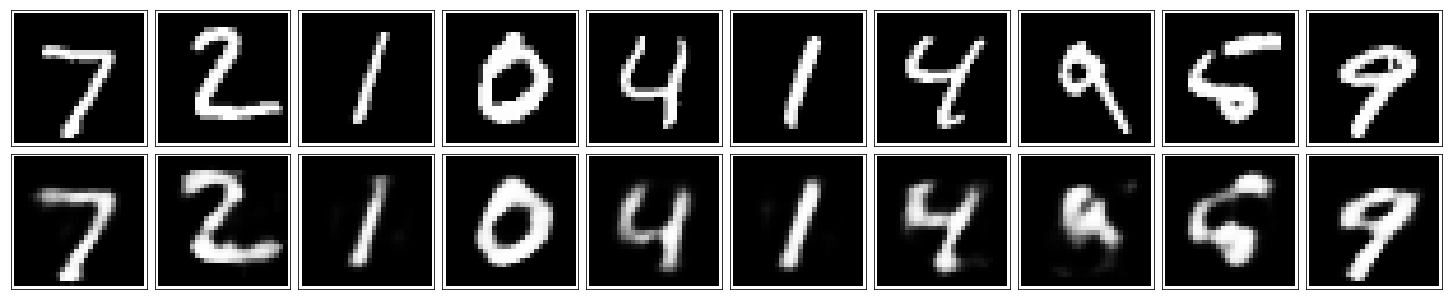

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [19]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.